# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

## Hard

Вы - ML-инженер в команде беспилотных автомобилей! Ваша следующая цель - сделать алгоритм, который будет распознавать дорожные знаки. Другая команда уже позаботилась о подготовке данных - вам приходят обрезанные картинки 32х32. Но есть проблема - разметка стоит денег, у проекта есть бюджетные ограничения, но вам готовы выделить тот бюджет, который вы сможете обосновать.

Определите сколько и каких семплов данных необходимо для того, чтобы обучить достаточно хороший алгоритм.

**Подсказка:** При анализе изображений обычно делают специальную предобработку - картинки крутят-вертят, по-разному меняют цвета. Рядом с данными лежит питоновский скрипт, может быть он поможет уменьшить необходимое количество семплов?

## Easy 

In [26]:

# Импорт бибилиотек 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Чтение данных
df = pd.read_pickle('train.pickle')

In [16]:

X = df['features'].reshape(df['features'].shape[0], -1)
y = df['labels']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Используем метрику Accuracy, так как это одна из самых удобных метрик для базового понятия классификации

In [17]:
# Предсказания логистической регрессии
y_pred_log_reg = log_reg.predict(X_test)

# Оценка логистической регрессии
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

accuracy_log_reg

0.9363505747126437

### Так же посмотрим classification report, там есть presicion, recall и f1 

In [27]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        38
           1       0.93      0.92      0.92       425
           2       0.91      0.92      0.92       394
           3       0.89      0.89      0.89       242
           4       0.92      0.90      0.91       373
           5       0.84      0.87      0.85       338
           6       0.89      1.00      0.94        56
           7       0.91      0.88      0.89       242
           8       0.86      0.95      0.90       237
           9       0.95      0.95      0.95       253
          10       0.96      0.98      0.97       332
          11       0.93      0.97      0.95       229
          12       1.00      0.98      0.99       417
          13       0.96      0.98      0.97       386
          14       0.98      0.97      0.97       130
          15       0.93      0.87      0.90       125
          16       0.99      0.87      0.92        77
          17       0.97    

## Посмотрии какой вид дорожных знаков модель путает чаще всего

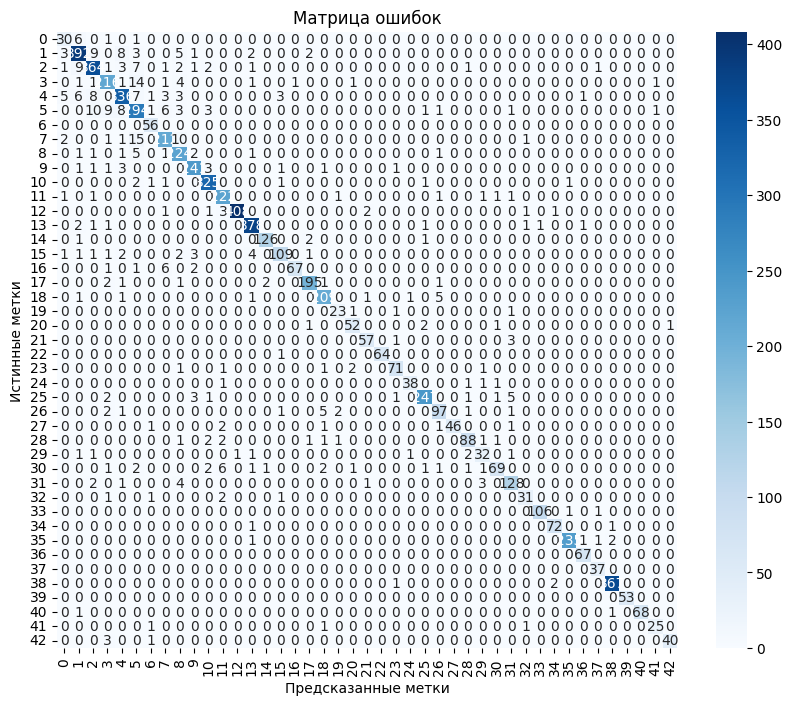

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()



### Смотрим

In [23]:

threshold = 5
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        if i != j and conf_matrix[i][j] > threshold: 
            print(f'Класс {i} часто путается с классом {j}, ошибок: {conf_matrix[i][j]}')

Класс 0 часто путается с классом 1, ошибок: 6
Класс 1 часто путается с классом 2, ошибок: 9
Класс 1 часто путается с классом 4, ошибок: 8
Класс 2 часто путается с классом 1, ошибок: 9
Класс 2 часто путается с классом 5, ошибок: 7
Класс 3 часто путается с классом 5, ошибок: 14
Класс 4 часто путается с классом 1, ошибок: 6
Класс 4 часто путается с классом 2, ошибок: 8
Класс 4 часто путается с классом 5, ошибок: 7
Класс 5 часто путается с классом 2, ошибок: 10
Класс 5 часто путается с классом 3, ошибок: 9
Класс 5 часто путается с классом 4, ошибок: 8
Класс 5 часто путается с классом 7, ошибок: 6
Класс 7 часто путается с классом 5, ошибок: 15
Класс 7 часто путается с классом 8, ошибок: 10
Класс 16 часто путается с классом 7, ошибок: 6
Класс 30 часто путается с классом 11, ошибок: 6


# Medium

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": SVC(kernel='linear'),
    "SVM Poly": SVC(kernel='poly', degree=3),
    "SVM RBF": SVC(kernel='rbf')
}

# Обучение моделей и оценка их производительности
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Определение лучшей и худшей модели
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"\nЛучшая модель: {best_model} с точностью {results[best_model]:.4f}")
print(f"Худшая модель: {worst_model} с точностью {results[worst_model]:.4f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.9536
kNN: 0.9011
Naive Bayes: 0.1631
SVM Linear: 0.9579
SVM Poly: 0.6432
SVM RBF: 0.8823

Лучшая модель: SVM Linear с точностью 0.9579
Худшая модель: Naive Bayes с точностью 0.1631


### Лучшая модель SVM Linear, худшая Naive Bayes

## Почему SVM на этих данных может плохо работать?

### Возможно данные у нас линейно зависимы, а для наивного байеса у нас все фичи должны быть линейно независимы

### Распределение данных: наивный байес лучше всего работает, когда признаки имеют Гауссово распределению. В случае с изображениями, распределение значений пикселей может отличаться, что ведет к ухудшению производительности.